In [1]:
import torch

In [2]:
import torchvision


In [3]:
from torchvision import transforms as T


In [4]:
from PIL import Image

In [8]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(pretrained = "true")

C:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to C:\Users\LENOVO/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100.0%


In [9]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       

In [10]:
ig = Image.open("image5.jpg")

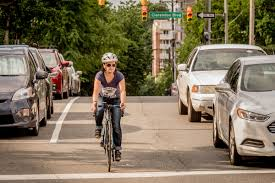

In [11]:
ig

In [13]:
transform = T.ToTensor()
img = transform(ig)

In [16]:
with torch.no_grad():
    pred = model([img])

In [17]:
pred

[{'boxes': tensor([[2.1181e+02, 5.3154e+01, 2.7500e+02, 1.6603e+02],
          [9.0793e+01, 5.2459e+01, 1.2698e+02, 1.5843e+02],
          [1.7457e+02, 4.3200e+01, 2.6642e+02, 1.2140e+02],
          [1.4318e-01, 4.5746e+01, 5.1000e+01, 1.3705e+02],
          [3.6330e+01, 4.8705e+01, 7.1332e+01, 9.9399e+01],
          [9.6971e+01, 9.7835e+01, 1.2351e+02, 1.6986e+02],
          [1.8658e+02, 6.1159e+00, 1.9281e+02, 2.0306e+01],
          [2.8966e+01, 4.6996e+01, 5.4809e+01, 1.2377e+02],
          [6.3511e+01, 6.1018e+01, 8.0927e+01, 9.6302e+01],
          [1.4137e+02, 3.5675e+00, 1.4805e+02, 2.2197e+01],
          [5.2364e+01, 5.0343e+01, 7.3470e+01, 9.6770e+01],
          [2.1112e+02, 5.9781e+01, 2.4211e+02, 1.5487e+02],
          [9.2794e+01, 1.0481e+02, 1.0357e+02, 1.3954e+02],
          [5.7296e+01, 4.9714e+01, 6.8369e+01, 6.7706e+01],
          [5.4328e-02, 4.8165e+01, 3.2079e+01, 1.2004e+02],
          [1.9680e+02, 1.1763e+01, 2.0136e+02, 1.8469e+01],
          [5.7564e+01, 4.9409e+

In [18]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"], pred[0]["scores"]

In [19]:
num = torch.argwhere(scores>0.9).shape[0]
num

6

In [20]:
coco_names = ["person","bicycle", "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" , 
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" , 
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" , 
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" , 
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush",]

In [21]:
import cv2

In [22]:
igg = cv2.imread("image5.jpg")

In [25]:
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    print(x1,y1,x2,y2)
    break

211 53 275 166


In [26]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(num):
    x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
    class_name = coco_names[labels.numpy()[i]-1]
    igg = cv2.rectangle(igg,(x1,y1),(x2,y2),(0,255,0),1)
    igg = cv2.putText(igg, class_name, (x1,y1-10),font,0.5,(255,0,0),1,cv2.LINE_AA)

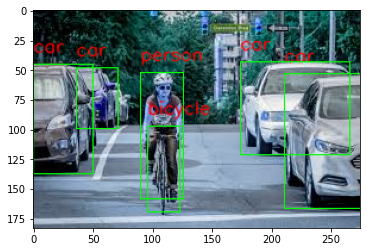

In [27]:
import matplotlib.pyplot as plt
plt.imshow(igg)

In [28]:
bboxes

tensor([[2.1181e+02, 5.3154e+01, 2.7500e+02, 1.6603e+02],
        [9.0793e+01, 5.2459e+01, 1.2698e+02, 1.5843e+02],
        [1.7457e+02, 4.3200e+01, 2.6642e+02, 1.2140e+02],
        [1.4318e-01, 4.5746e+01, 5.1000e+01, 1.3705e+02],
        [3.6330e+01, 4.8705e+01, 7.1332e+01, 9.9399e+01],
        [9.6971e+01, 9.7835e+01, 1.2351e+02, 1.6986e+02],
        [1.8658e+02, 6.1159e+00, 1.9281e+02, 2.0306e+01],
        [2.8966e+01, 4.6996e+01, 5.4809e+01, 1.2377e+02],
        [6.3511e+01, 6.1018e+01, 8.0927e+01, 9.6302e+01],
        [1.4137e+02, 3.5675e+00, 1.4805e+02, 2.2197e+01],
        [5.2364e+01, 5.0343e+01, 7.3470e+01, 9.6770e+01],
        [2.1112e+02, 5.9781e+01, 2.4211e+02, 1.5487e+02],
        [9.2794e+01, 1.0481e+02, 1.0357e+02, 1.3954e+02],
        [5.7296e+01, 4.9714e+01, 6.8369e+01, 6.7706e+01],
        [5.4328e-02, 4.8165e+01, 3.2079e+01, 1.2004e+02],
        [1.9680e+02, 1.1763e+01, 2.0136e+02, 1.8469e+01],
        [5.7564e+01, 4.9409e+01, 6.4485e+01, 6.2502e+01],
        [4.446